# Julia Basics

Most of our interaction with Julia will be through the Jupyter notebooks.

## Elements

Let’s start with some basic computations.

In [1]:
2+3

5

In [2]:
sin(pi/4)

0.7071067811865475

One way to learn about a function is to search for it online in the [Julia documentation](https://docs.julialang.org/). For example, the syntax for the logarithm function is
log(b, x) where b is the base.

In [3]:
log(2,4)

2.0

# Array

Here is the basic syntax to create an array:

In [4]:
x = [10, 20, 30]

3-element Vector{Int64}:
 10
 20
 30

An array of integers of 64 bits. If we input a real, Julia will change the type accordingly:

In [5]:
x = [10, 20, 30, 0.1]

4-element Vector{Float64}:
 10.0
 20.0
 30.0
  0.1

If we use space instead of commas, we obtain row vectors:

In [6]:
x = [10 20 30 0.1]

1×4 Matrix{Float64}:
 10.0  20.0  30.0  0.1

To obtain a column vector, we transpose the row vector:

In [7]:
x'

4×1 adjoint(::Matrix{Float64}) with eltype Float64:
 10.0
 20.0
 30.0
  0.1

Here is another way to construct a 1-dim array, and some array operations:

In [8]:
x = [10*i for i=1:5]

5-element Vector{Int64}:
 10
 20
 30
 40
 50

In [9]:
last(x)

50

In [10]:
minimum(x)

10

In [11]:
sum(x)

150

In [12]:
append!(x, 99)

6-element Vector{Int64}:
 10
 20
 30
 40
 50
 99

In [13]:
x

6-element Vector{Int64}:
 10
 20
 30
 40
 50
 99

In [14]:
x[4]

40

In [15]:
length(x)

6

In [16]:
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

Broadcasting syntax (or dot syntax) is an easy way to apply a function to an array:

In [17]:
sin.(x)

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

## Plotting

There are several packages for plotting functions and we will use the Plots package. To install the package, open a Julia terminal. Here is how it looks like:

![Julia Terminal](imgs/julia-terminal.png)

Press `]` to switch to the package mode, and then type and enter `add Plots`. Your terminal will look like this:

![add Plots in Julia Terminal](imgs/julia-add-plots.png)

When the package is loaded, you can go back to the Jupyter notebook, and type `using Plots` to start the package.

In [18]:
using Plots

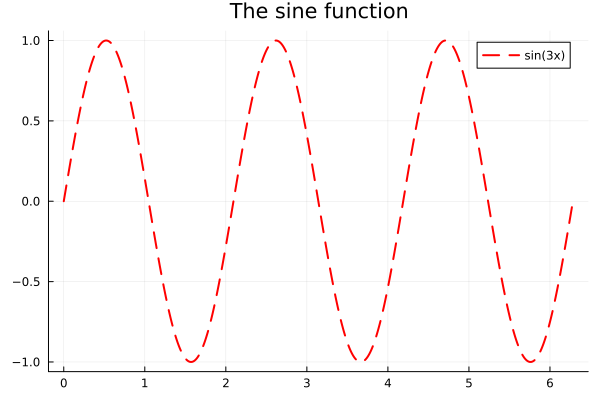

In [19]:
using Plots
x = range(0, stop=2*pi, length=1000)
y = sin.(3x)
plot(x, y, color=:red, lw=2.0, ls=:dash, label="sin(3x)")
title!("The sine function")

Let’s plot two functions, sin $3x$ and cos $x$, and label them appropriately.

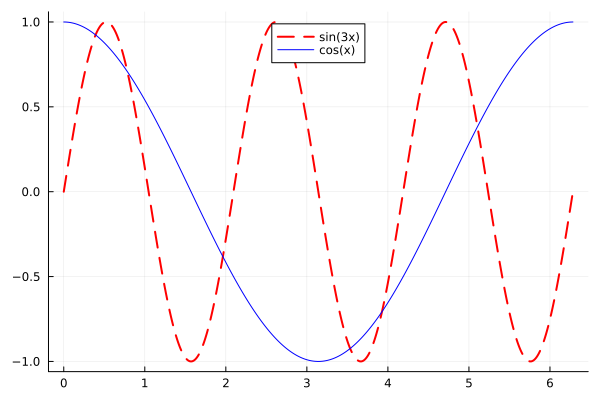

In [20]:
x = range(0, stop=2*pi, length=1000)
y = sin.(3x)
z = cos.(x)

plot(x, y, c=:red, lw=2.0, ls=:dash, label="sin(3x)", legend=:top)
plot!(x, z, c=:blue, lw=1.0, ls=:solid, label="cos(x)")

## Matrix operations

Let’s create a 3 × 3 matrix:

In [21]:
A=[-1 0.26 0.74; 0.09 -1 0.26; 1 1 1]

3×3 Matrix{Float64}:
 -1.0    0.26  0.74
  0.09  -1.0   0.26
  1.0    1.0   1.0

Transpose of $A$ is computed as:

In [22]:
A'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.0    0.09  1.0
  0.26  -1.0   1.0
  0.74   0.26  1.0

Here is its inverse.

In [23]:
inv(A)

3×3 Matrix{Float64}:
 -0.59693     0.227402  0.382604
  0.0805382  -0.824332  0.154728
  0.516392    0.59693   0.462668

In [24]:
A * inv(A)

3×3 Matrix{Float64}:
  1.0          -5.55112e-17  0.0
  1.38778e-16   1.0          1.249e-16
 -2.22045e-16   0.0          1.0

Let’s try matrix vector multiplication. Define some vector $v$ as:

In [25]:
v = [0 0 1]

1×3 Matrix{Int64}:
 0  0  1

Now try $A ∗ v$ to multiply them

In [26]:
A * v

DimensionMismatch: DimensionMismatch: matrix A has dimensions (3,3), matrix B has dimensions (1,3)

What went wrong? The dimensions do not match. $A$ is 3 by 3, but $v$ is 1 by 3. To enter $v$ as a 3 by 1 matrix, we need to type it as follows, using the transpose operation. (Check out the correct dimension displayed in the output.)

In [27]:
v = [0 0 1]'

3×1 adjoint(::Matrix{Int64}) with eltype Int64:
 0
 0
 1

In [28]:
A * v

3×1 Matrix{Float64}:
 0.74
 0.26
 1.0

To solve the matrix equation $Ax = v$, type:

In [29]:
A \ v

3×1 Matrix{Float64}:
 0.3826037521318931
 0.15472806518855411
 0.4626681826795528

The solution to $Ax = v$ can be also computed as $x = A^{−1}v$ as follows:

In [30]:
inv(A) * v

3×1 Matrix{Float64}:
 0.3826037521318931
 0.15472806518855398
 0.4626681826795528

Powers of $A$ can be computed as:

In [31]:
A^5

3×3 Matrix{Float64}:
 -2.8023     0.395834  2.76652
  0.125727  -1.39302   0.846217
  3.74251    3.24339   4.51654

## Logic operations

Here are some basic logic operations:

In [32]:
2 == 3

false

In [33]:
2 <= 3

true

In [34]:
(2 == 2) || (1 < 0)

true

In [35]:
(2 == 2) && (1 < 0)

false

In [36]:
iseven(4)

true

In [37]:
iseven(5)

false

In [38]:
isodd(5)

true

## Defining functions

There are three ways to define a function. Here is the basic syntax:

In [39]:
function squareit(x)
    return x^2
end

squareit (generic function with 1 method)

In [40]:
squareit(3)

9

In [41]:
cubeit(x) = x^3

cubeit (generic function with 1 method)

There is also a compact form to define a function, if the body of the function is a short,
simple expression:

In [42]:
cubeit(5)

125

Functions can be defined without being given a name: these are called anonymous functions:

In [43]:
x-> x^3

#11 (generic function with 1 method)

Using anonymous functions we can manipulate arrays easily. For example, suppose we want to pick the elements of an array that are greater than 0. This can be done using the function `filter` together with an anonymous function `x-> x>0`.

In [44]:
filter(x-> x>0, [-2, 3, 4, 5, -3, 0])

3-element Vector{Int64}:
 3
 4
 5

The function `count` is similar to `filter`, but it only computes the number of elements of the array that satisfy the condition described by the anonymous function.

In [45]:
count(x-> x>0, [-2, 3, 4, 5, -3, 0])

3

## Types

In Julia, there are several types for integers and floating-point numbers such as Int8, Int64, Float16, Float64, and more advanced types for Boolean variables, characters, and strings.
When we write a function, we do not have to declare the type of its variables: Julia figures what the correct type is when the code is compiled. This is called a dynamic type system.
For example, consider the `squareit` function we defined before:

In [46]:
function squareit(x)
    return x^2
end

squareit (generic function with 1 method)

The type of $x$ is not declared in the function definition. We can call it with real or integer inputs, and Julia will know what to do:

In [47]:
squareit(5)

25

In [48]:
squareit(5.5)

30.25

Now let’s write another version of `squareit` which specifies the type of the input as a 64-bit floating-point number:

In [49]:
function typesquareit(x::Float64)
    return x^2
end

typesquareit (generic function with 1 method)

This function can only be used if the input is a floating-point number:

In [50]:
typesquareit(5.5)

30.25

In [51]:
typesquareit(5)

MethodError: MethodError: no method matching typesquareit(::Int64)

Closest candidates are:
  typesquareit(!Matched::Float64)
   @ Main f:\congenial-happiness\numerical-analysis_notebooks\fundamentals\julia-basics.ipynb:1


Clearly, dynamic type systems offer much simplicity and flexibility to the programmer, even though declaring the type of inputs may improve the performance of a code.

## Control flow

Let’s create an array of 10 entries of floating-type, setting the entries to essentially 0. In the following, `undef` means we are creating an unitialized array

In [52]:
values = zeros(10)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Now we will set the elements of the array to values of sin function.

In [53]:
for n in 1:10
    values[n] = sin(n^2)
end

In [54]:
values

10-element Vector{Float64}:
  0.8414709848078965
 -0.7568024953079282
  0.4121184852417566
 -0.2879033166650653
 -0.13235175009777303
 -0.9917788534431158
 -0.9537526527594719
  0.9200260381967907
 -0.6298879942744539
 -0.5063656411097588

Here is another way to do this. Start with creating an empty array:

In [55]:
newvalues = Array{Float64}(undef, 0)

Float64[]

Then use a `while` statement to generate the values, and append them to the array.

In [56]:
n = 1
while n <= 10
    append!(newvalues, sin(n^2))
    n = n + 1
end
newvalues

10-element Vector{Float64}:
  0.8414709848078965
 -0.7568024953079282
  0.4121184852417566
 -0.2879033166650653
 -0.13235175009777303
 -0.9917788534431158
 -0.9537526527594719
  0.9200260381967907
 -0.6298879942744539
 -0.5063656411097588

Here is how the `if` statement works:

In [57]:
f(x, y) =
    if x < y
        println("$x is less than $y")
    elseif x > y
        println("$x is greater than $y")
    else
        println("$x is equal to $y")
    end

f (generic function with 1 method)

In [58]:
f(2, 3)

2 is less than 3


In [59]:
f(3, 2)

3 is greater than 2


In [60]:
f(1, 1)

1 is equal to 1


And here is an interesting property of the function `return`:

In [61]:
n = 1
while n <= 20
    if iseven(n)
        return n
    end
    n = n + 1
end

2

Why did the above execution stop at 2? Let’s try `println` instead of `return`:

In [62]:
n = 1
while n <= 20
    if iseven(n)
        println(n)
    end
    n = n + 1
end

2
4
6
8
10
12
14
16
18
20


## Random numbers

These are 10 uniform random numbers from (0, 1).

In [63]:
rand(10)

10-element Vector{Float64}:
 0.5700969493409005
 0.6569631727036028
 0.6231408439277158
 0.4085778275357962
 0.5436803736411073
 0.697237251817505
 0.6354229103998902
 0.636996894166262
 0.7849318565694198
 0.2859025099064999

And these are random numbers from the standard normal distribution:

In [64]:
randn(10)

10-element Vector{Float64}:
 -0.17279918368231406
  0.224375333953016
  1.9959768374735454
 -0.2984157714753534
 -1.4768436258218454
  0.041355835350515555
  1.3565858829896429
 -1.4695873815337583
  2.281397743978724
  0.6924664994026319

Here is a histogram of 105 random numbers from the standard normal distribution, using the Plots package:

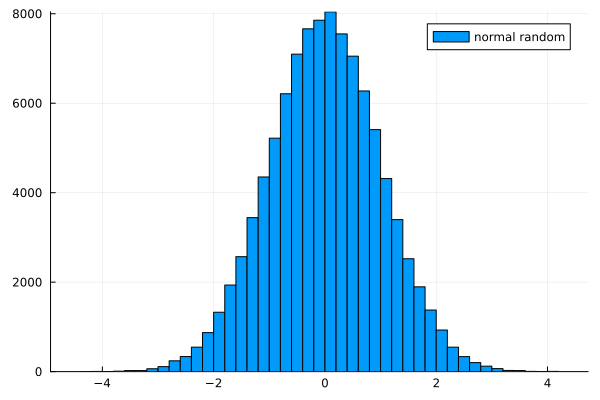

In [70]:
y = randn(10^5)
histogram(y, bins=50, label="normal random")

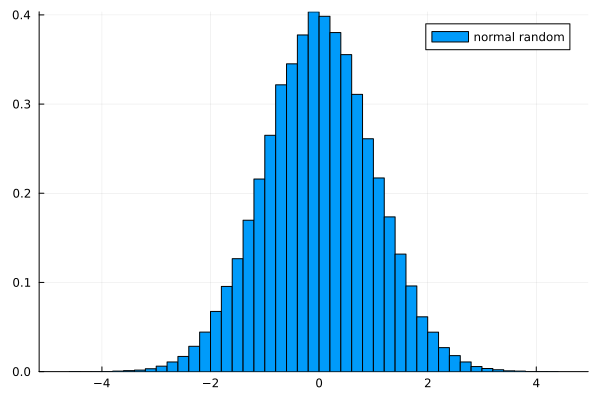

In [66]:
y = randn(10^5)
histogram(y, bins=50, label="normal random", normalize=true)